In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import datetime
from scipy import stats

In [2]:
filename = sys.argv[1]
# filename = 'reddit-counts.json.gz'

counts = pd.read_json(filename, lines=True)

counts = counts.loc[((counts['date'].dt.year == 2012) | (counts['date'].dt.year == 2013))&(counts['subreddit'] == 'canada')].reset_index(drop = True)
# print(counts)

In [3]:
def check_weekend(date):
    return date.weekday()
# check_weekend = np.vectorize(check_weekend)

In [4]:
counts['weekday'] = counts['date'].apply(check_weekend)
# print(counts)

In [5]:
weekday = counts.loc[(counts['weekday'] != 5) & (counts['weekday'] != 6)].reset_index(drop = True)
# print(weekday)

In [6]:
weekend = counts.loc[(counts['weekday'] == 5) | (counts['weekday'] == 6)].reset_index(drop = True)
# print(weekend)

In [7]:
ttest_pvalue = stats.ttest_ind(weekday['comment_count'], weekend['comment_count']).pvalue
# print(ttest_pvalue)
# ttest_pvalue = 1.3005502847207912e-58

normal_weekday = stats.normaltest(weekday['comment_count']).pvalue
normal_weekend = stats.normaltest(weekend['comment_count']).pvalue
# print(normal_weekday)
# print(normal_weekend)

# normal_weekday = 1.0091137251707994e-07
# normal_weekend = 0.0015209196859635404
# not normally distributed 

In [8]:
levene_pvalue = stats.levene(weekday['comment_count'], weekend['comment_count']).pvalue
# print(levene_pvalue)
      
# levene_pvalue = 0.04378740989202803
# Reject, there is no equal variance

# Fix 1:

(array([10., 26., 37., 44., 31., 27., 16.,  8.,  6.,  4.]),
 array([ 619. ,  782.5,  946. , 1109.5, 1273. , 1436.5, 1600. , 1763.5,
        1927. , 2090.5, 2254. ]),
 <a list of 10 Patch objects>)

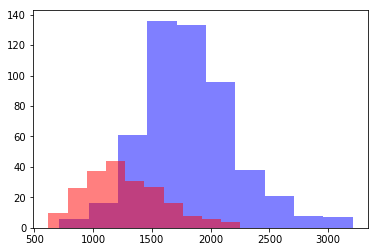

In [9]:
plt.hist(weekday['comment_count'], facecolor='blue', alpha=0.5)
plt.hist(weekend['comment_count'], facecolor='red', alpha=0.5)
# plt.show()

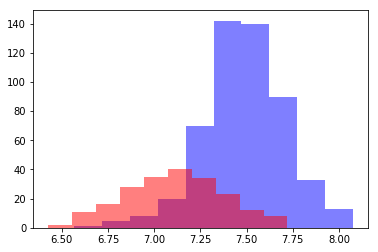

In [10]:
log_weekday = np.log(weekday['comment_count'])
log_weekend = np.log(weekend['comment_count'])
plt.hist(log_weekday, facecolor='blue', alpha=0.5)
plt.hist(log_weekend, facecolor='red', alpha=0.5)
# plt.show()
log_normal_weekday = stats.normaltest(log_weekday).pvalue # 0.00040159142006827235
log_normal_weekend = stats.normaltest(log_weekend).pvalue # 0.31493886820667
log_levene = stats.levene(log_weekday, log_weekend).pvalue # 0.0004190759393372205
# print(log_normal_weekday)
# print(log_normal_weekend)
# print(log_levene)

In [11]:
# exp_weekday = np.exp(weekday['comment_count'])
# exp_weekend = np.exp(weekend['comment_count'])
# print(exp_weekday)
# print(exp_weekend)
# plt.hist(exp_weekday, facecolor='blue', alpha=0.5)
# plt.hist(exp_weekend, facecolor='red', alpha=0.5)
# plt.show()
# exp_normal_weekday = stats.normaltest(exp_weekday).pvalue
# exp_normal_weekend = stats.normaltest(exp_weekend).pvalue
# exp_levene = stats.levene(exp_weekday, exp_weekend).pvalue
# print(exp_normal_weekday)
# print(exp_normal_weekend)
# print(exp_levene)

# Cannot create the histogram, since exp_weekday and exp_weekend are INF.

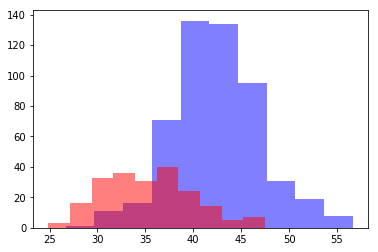

In [12]:
sqrt_weekday = np.sqrt(weekday['comment_count'])
sqrt_weekend = np.sqrt(weekend['comment_count'])
plt.hist(sqrt_weekday, facecolor='blue', alpha=0.5)
plt.hist(sqrt_weekend, facecolor='red', alpha=0.5)
# plt.show()
sqrt_normal_weekday = stats.normaltest(sqrt_weekday).pvalue # 0.03687221613365365
sqrt_normal_weekend = stats.normaltest(sqrt_weekend).pvalue # 0.10760562894666933
sqrt_levene = stats.levene(sqrt_weekday, sqrt_weekend).pvalue # 0.5560544297516696
# print(sqrt_normal_weekday)
# print(sqrt_normal_weekend)
# print(sqrt_levene)

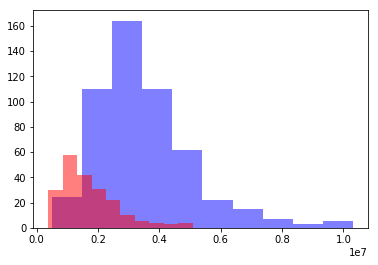

In [13]:
e2_weekday = (weekday['comment_count']) ** 2
e2_weekend = (weekend['comment_count']) ** 2
plt.hist(e2_weekday, facecolor='blue', alpha=0.5)
plt.hist(e2_weekend, facecolor='red', alpha=0.5)
# plt.show()
e2_normal_weekday = stats.normaltest(e2_weekday).pvalue # 2.7798243005635955e-29
e2_normal_weekend = stats.normaltest(e2_weekend).pvalue # 2.991195568683962e-11
e2_levene = stats.levene(e2_weekday, e2_weekend).pvalue # 7.391434727467261e-08
# print(e2_normal_weekday)
# print(e2_normal_weekend)
# print(e2_levene)

In [14]:
# From the test I did, sqrt is the best. So I choose using np.sqrt().
# sqrt_weekday
# sqrt_weekend
# sqrt_normal_weekday = 0.03687221613365365
# sqrt_normal_weekend = 0.10760562894666933
# sqrt_levene = 0.5560544297516696

# Fix2

In [15]:
def toweek(data):
    return data.isocalendar()
# toweek = np.vectorize(toweek)

In [16]:
weekday['toweek'] = weekday['date'].apply(toweek)
weekend['toweek'] = weekend['date'].apply(toweek)
# print(weekday)
weekday = weekday.join(weekday['toweek'].apply(pd.Series))
weekend = weekend.join(weekend['toweek'].apply(pd.Series))
# print(weekday)

In [17]:
weekday = weekday.rename(columns = {0:'year', 1:'week', 2:'day'})
weekend = weekend.rename(columns = {0:'year', 1:'week', 2:'day'})
# print(weekday)

In [18]:
weekday_mean = weekday.groupby(['year', 'week'])['comment_count'].mean().reset_index()
weekend_mean = weekend.groupby(['year', 'week'])['comment_count'].mean().reset_index()
# print(weekday_mean)

In [19]:
normal_weekday_meam = stats.normaltest(weekday_mean['comment_count']).pvalue # 0.3082637390825463
normal_weekend_meam = stats.normaltest(weekend_mean['comment_count']).pvalue # 0.15294924717078442
levene_mean = stats.levene(weekday_mean['comment_count'],weekend_mean['comment_count']).pvalue # 0.20383788083573426
ttest_mean = stats.ttest_ind(weekday_mean['comment_count'],weekend_mean['comment_count']).pvalue  # 1.3353656052303144e-34
# print(normal_weekday_meam)
# print(normal_weekend_meam)
# print(levene_mean)
# print(ttest_mean)

# Fix 3

In [20]:
utest_pvalue = stats.mannwhitneyu(weekday['comment_count'],weekend['comment_count']).pvalue # 4.3122266173669665e-53
# print(utest_pvalue)

In [21]:
OUTPUT_TEMPLATE = (
    "Initial (invalid) T-test p-value: {initial_ttest_p:.3g}\n"
    "Original data normality p-values: {initial_weekday_normality_p:.3g} {initial_weekend_normality_p:.3g}\n"
    "Original data equal-variance p-value: {initial_levene_p:.3g}\n"
    "Transformed data normality p-values: {transformed_weekday_normality_p:.3g} {transformed_weekend_normality_p:.3g}\n"
    "Transformed data equal-variance p-value: {transformed_levene_p:.3g}\n"
    "Weekly data normality p-values: {weekly_weekday_normality_p:.3g} {weekly_weekend_normality_p:.3g}\n"
    "Weekly data equal-variance p-value: {weekly_levene_p:.3g}\n"
    "Weekly T-test p-value: {weekly_ttest_p:.3g}\n"
    "Mann–Whitney U-test p-value: {utest_p:.3g}"
)

In [22]:
def main():
#     reddit_counts = sys.argv[1]

    # ...

    print(OUTPUT_TEMPLATE.format(
        initial_ttest_p=ttest_pvalue,
        initial_weekday_normality_p=normal_weekday,
        initial_weekend_normality_p=normal_weekend,
        initial_levene_p=levene_pvalue,
        transformed_weekday_normality_p=sqrt_normal_weekday,
        transformed_weekend_normality_p=sqrt_normal_weekend,
        transformed_levene_p=sqrt_levene,
        weekly_weekday_normality_p=normal_weekday_meam,
        weekly_weekend_normality_p=normal_weekend_meam,
        weekly_levene_p=levene_mean,
        weekly_ttest_p=ttest_mean,
        utest_p=utest_pvalue,
    ))


In [23]:
if __name__ == '__main__':
    main()

Initial (invalid) T-test p-value: 1.3e-58
Original data normality p-values: 1.01e-07 0.00152
Original data equal-variance p-value: 0.0438
Transformed data normality p-values: 0.0369 0.108
Transformed data equal-variance p-value: 0.556
Weekly data normality p-values: 0.308 0.153
Weekly data equal-variance p-value: 0.204
Weekly T-test p-value: 1.34e-34
Mann–Whitney U-test p-value: 4.31e-53
